# WeatherPY

### Analysis on WeatherPY
-  The plot on Latitude vs Temperature shows that the temperature is highest at the equator and lowest at the poles.
-  The humidity at the equator is in the range from 50%-100%. Howeever, the trends does not change based on the latitude.
-  There seems to be no co-relation of cloudliness with respect to the latitude.
-  The windspeed for most cities fall under 20mph and there seems to be no trend on the windspeed with respect to the latitude.


In [1]:
# Dependencies
import random
import requests as req

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from citipy import citipy
import openweathermapy as owm

#To get the current date
import datetime
now = datetime.datetime.now()

In [2]:
# Create a settings object with your API key and preferred units
api_key = "4af76c79df8d11f6295bc8323877e2e5"
#Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [3]:

# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,2000)
long_samples=random.sample(long,2000)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_DF=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_DF["City"]=""
cities_DF["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_DF.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_DF.set_value(index, "City", city.city_name)
    cities_DF.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_DF=cities_DF.drop(cities_DF.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_DF=cities_DF.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 700 cities 
cities_DF=cities_DF.sample(n=700)

# Resetting the index of the cities list
cities_DF=cities_DF.reset_index(drop=True)

cities_DF.head()

,City,Country
0,wageningen,sr
1,westport,nz
2,puerto escondido,co
3,chalmette,us
4,gurskoye,ru


## Perform API Calls

In [4]:
# Get data for each city in cities_DF
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nBeginning Data Retrieval\n-----------------------------")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_DF.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print("\n\033[1;31mCity not found. Skipping...\033[1;30m")

print("\n-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------

Processing record 1|wageningen,sr

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=wageningen,sr

Processing record 2|westport,nz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=westport,nz

Processing record 3|puerto escondido,co

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=puerto+escondido,co

Processing record 4|chalmette,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=chalmette,us

Processing record 5|gurskoye,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=gurskoye,ru

City not found. Skipping...

Processing record 6|imbituba,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=imbit


Processing record 52|montepuez,mz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=montepuez,mz

Processing record 53|misratah,ly

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=misratah,ly

Processing record 54|galle,lk

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=galle,lk

Processing record 55|saldanha,za

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=saldanha,za

Processing record 56|ucluelet,ca

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=ucluelet,ca

Processing record 57|garsten,at

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=garsten,at

Processing record 58|chunhuhub,mx

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df


Processing record 104|yelahanka,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=yelahanka,in

Processing record 105|udachnyy,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=udachnyy,ru

Processing record 106|rantoul,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=rantoul,us

Processing record 107|tabulbah,tn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tabulbah,tn

City not found. Skipping...

Processing record 108|husavik,is

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=husavik,is

Processing record 109|lokosovo,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=lokosovo,ru

Processing record 110|le vauclin,mq

https://api.openweather


Processing record 156|mantua,cu

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mantua,cu

Processing record 157|marsh harbour,bs

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=marsh+harbour,bs

Processing record 158|bontang,id

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bontang,id

Processing record 159|besikduzu,tr

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=besikduzu,tr

Processing record 160|cheuskiny,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=cheuskiny,ru

City not found. Skipping...

Processing record 161|chagda,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=chagda,ru

City not found. Skipping...

Processing record 162|ari


Processing record 207|ewa beach,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=ewa+beach,us

Processing record 208|zhigansk,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=zhigansk,ru

Processing record 209|fortuna,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=fortuna,us

Processing record 210|illoqqortoormiut,gl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=illoqqortoormiut,gl

City not found. Skipping...

Processing record 211|nikolskoye,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=nikolskoye,ru

City not found. Skipping...

Processing record 212|mogadishu,so

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mogadishu,so

Process


Processing record 260|narsaq,gl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=narsaq,gl

Processing record 261|dikson,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=dikson,ru

Processing record 262|sao sebastiao,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=sao+sebastiao,br

Processing record 263|taman,id

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=taman,id

Processing record 264|zyryanka,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=zyryanka,ru

Processing record 265|faanui,pf

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=faanui,pf

Processing record 266|fenyi,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79d


Processing record 313|maddur,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=maddur,in

Processing record 314|kailua,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kailua,us

Processing record 315|kahului,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kahului,us

Processing record 316|tasiilaq,gl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tasiilaq,gl

Processing record 317|brae,gb

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=brae,gb

Processing record 318|bonthe,sl

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bonthe,sl

Processing record 319|tongling,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295b


Processing record 366|barentsburg,sj

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=barentsburg,sj

City not found. Skipping...

Processing record 367|harboore,dk

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=harboore,dk

Processing record 368|xuddur,so

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=xuddur,so

Processing record 369|pitimbu,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=pitimbu,br

Processing record 370|bilibino,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bilibino,ru

Processing record 371|longyearbyen,sj

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=longyearbyen,sj

Processing record 372|te anau,nz

https://api.open

Processing record 419|mys shmidta,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mys+shmidta,ru

City not found. Skipping...

Processing record 420|bonfim,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bonfim,br

Processing record 421|bizhbulyak,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=bizhbulyak,ru

Processing record 422|east london,za

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=east+london,za

Processing record 423|tank,pk

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tank,pk

Processing record 424|mackay,au

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mackay,au

Processing record 425|qinggang,cn

https://api.openweatherm


City not found. Skipping...

Processing record 471|busselton,au

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=busselton,au

Processing record 472|tafresh,ir

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tafresh,ir

Processing record 473|puerto del rosario,es

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=puerto+del+rosario,es

Processing record 474|aboisso,ci

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=aboisso,ci

Processing record 475|noumea,nc

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=noumea,nc

Processing record 476|ayagoz,kz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=ayagoz,kz

Processing record 477|lashio,mm

https://api.ope


Processing record 523|formoso do araguaia,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=formoso+do+araguaia,br

City not found. Skipping...

Processing record 524|masaba,ph

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=masaba,ph

Processing record 525|vaini,to

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=vaini,to

Processing record 526|enumclaw,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=enumclaw,us

Processing record 527|dwarka,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=dwarka,in

Processing record 528|kadykchan,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kadykchan,ru

City not found. Skipping...

Processing record 5


Processing record 575|luderitz,na

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=luderitz,na

Processing record 576|mahanoro,mg

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=mahanoro,mg

Processing record 577|tolaga bay,nz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=tolaga+bay,nz

Processing record 578|pathalgaon,in

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=pathalgaon,in

Processing record 579|lamar,us

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=lamar,us

Processing record 580|achacachi,bo

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=achacachi,bo

Processing record 581|makakilo city,us

https://api.openweathermap.org/data/2.5/wea


Processing record 627|ondorhaan,mn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=ondorhaan,mn

City not found. Skipping...

Processing record 628|inderborskiy,kz

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=inderborskiy,kz

City not found. Skipping...

Processing record 629|wulanhaote,cn

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=wulanhaote,cn

City not found. Skipping...

Processing record 630|agirish,ru

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=agirish,ru

Processing record 631|torres,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=torres,br

Processing record 632|manaus,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=manaus,


Processing record 679|lata,sb

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=lata,sb

City not found. Skipping...

Processing record 680|katsuura,jp

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=katsuura,jp

Processing record 681|kanbe,mm

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=kanbe,mm

Processing record 682|muisne,ec

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=muisne,ec

Processing record 683|portree,gb

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=portree,gb

Processing record 684|arinos,br

https://api.openweathermap.org/data/2.5/weather?appid=4af76c79df8d11f6295bc8323877e2e5&units=imperial&q=arinos,br

Processing record 685|fairbanks,us

https://api.openweathermap.org/data/2.5/weathe

## Weather DataFrame 

In [5]:
# Create an "extracts" object to get the various parameter required to form the weather data table
summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Wageningen,SR,1513783853,5.77,-56.68,81.39,95,14.23,20
1,Westport,NZ,1513783853,-41.75,171.60,48.04,100,1.48,0
2,Puerto Escondido,CO,1513782000,9.02,-76.26,84.20,70,4.94,40
3,Chalmette,US,1513783080,29.94,-89.96,73.40,94,19.46,90
4,Imbituba,BR,1513782000,-28.24,-48.67,78.80,83,4.70,75


In [6]:
#Save the result to a csv file
weather_data.to_csv("Output/Weather_Data.csv")
# Count of the data in the dataframe
weather_data.count()

City           593
Country        593
Date           593
Latitude       593
Longitude      593
Temperature    593
Humidity       593
Wind speed     593
Cloudliness    593
dtype: int64

## Latitude vs Temperature Plot

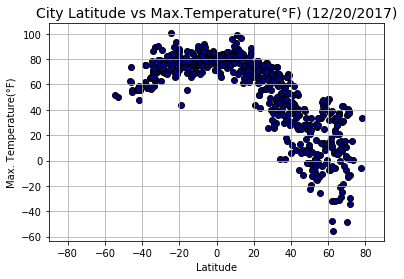

In [7]:
# Latitude vs Max. Temperature(F)
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="navy",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature(°F)")
plt.xlim(-90,90)
plt.title("City Latitude vs Max.Temperature(°F) (%s/%s/%s)"%(now.month,now.day,now.year),fontsize=14)
plt.grid(True)
plt.savefig("Output/City Latitude vs Temperature.jpeg")
plt.show()

## Latitude vs Humidity Plot

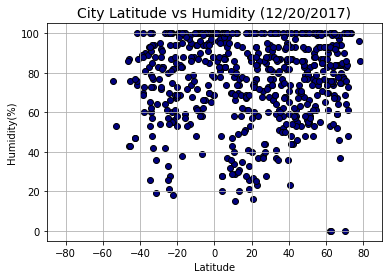

In [8]:
# Latitude vs Humidity

plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="navy",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-90,90)
plt.title("City Latitude vs Humidity (%s/%s/%s)"%(now.month,now.day,now.year),fontsize=14)
plt.grid(True)
plt.savefig("Output/City Latitude vs Humidity.jpeg")
plt.show()

## Latitude vs Cloudliness

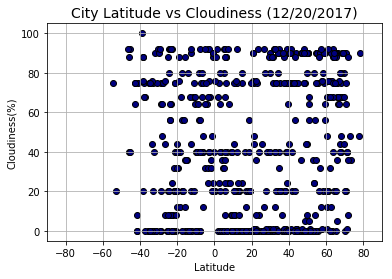

In [9]:
# Latitude vs Cloudliness  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="navy",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-90,90)
plt.title("City Latitude vs Cloudiness (%s/%s/%s)"%(now.month,now.day,now.year),fontsize=14)
plt.grid(True)
plt.savefig("Output/City Latitude vs Cloudiness.jpeg")
plt.show()

## Latitude vs Wind Speed  

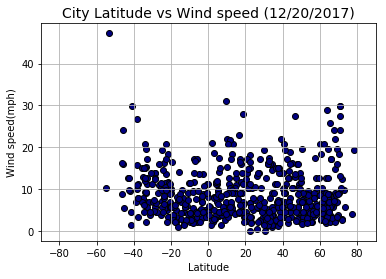

In [10]:
# Latitude vs Wind Speed  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="navy",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind speed(mph)")
plt.xlim(-90,90)
plt.title("City Latitude vs Wind speed (%s/%s/%s)"%(now.month,now.day,now.year),fontsize=14)
plt.grid(True)
plt.savefig("Output/City Latitude vs Wind speed.jpeg")
plt.show()